<a href="https://colab.research.google.com/github/GoreckiArtur/Zaawansowane-przetwarzanie-obrazu/blob/main/G%C3%B3recki_Artur_Praca_dom_05_ver01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Praca Domowa 05 Artur Górecki**

# Zadanie 00
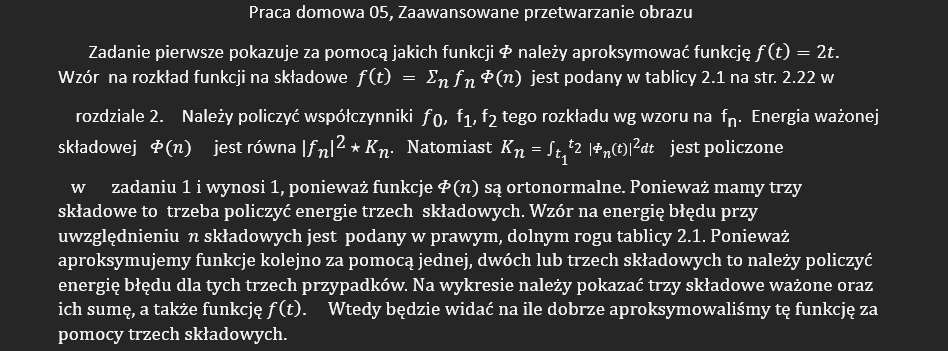

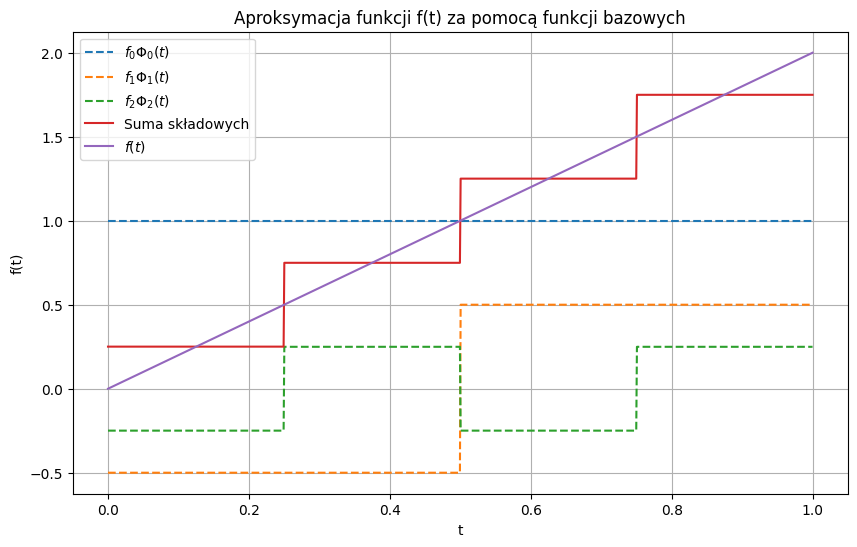

Energia składowej f_0:  1.0
Energia składowej f_1:  0.250000501001753
Energia składowej f_2:  0.062250125250187575
Energia błędu dla jednej składowej:  0.3333340013353361
Energia błędu dla dwóch składowych:  0.08333350033358311
Energia błędu dla trzech składowych:  0.02108337508339564


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Definicja funkcji bazowych
def phi_0(t):
    return np.ones_like(t)

def phi_1(t):
    return np.where(t < 0.5, 1, -1)

def phi_2(t):
    return np.where(((t < 0.25) | ((t >= 0.5) & (t < 0.75))), 1, -1)

# Definicja funkcji f(t) = 2t
def f(t):
    return 2 * t

# Zakres czasu
t = np.linspace(0, 1, 1000)

# Obliczenie współczynników fn
def calculate_fn(t, phi):
    numerator = np.trapz(f(t) * phi(t), t)
    denominator = np.trapz(phi(t) * phi(t), t)
    return numerator / denominator

# Obliczenie energii ważonej składowej
def weighted_energy(phi, fn, Kn=1):
    return np.abs(fn)**2 * Kn

# Obliczenie energii błędu
def error_energy(f, t, phi, fn_array, Kn_array):
    f_squared_integral = np.trapz(np.abs(f(t))**2, t)
    sum_fn_Kn = np.sum(np.abs(fn_array)**2 * Kn_array)
    return f_squared_integral - sum_fn_Kn

# Obliczenie współczynników fn
fn_0 = calculate_fn(t, phi_0)
fn_1 = calculate_fn(t, phi_1)
fn_2 = calculate_fn(t, phi_2)

# Obliczenie energii ważonej składowej
Kn = 1  # Kn = 1, ponieważ funkcje bazowe są ortonormalne
energy_0 = weighted_energy(phi_0, fn_0, Kn)
energy_1 = weighted_energy(phi_1, fn_1, Kn)
energy_2 = weighted_energy(phi_2, fn_2, Kn)

# Obliczenie energii błędu
error_energy_0 = error_energy(f, t, phi_0, np.array([fn_0]), np.array([Kn]))
error_energy_1 = error_energy(f, t, phi_1, np.array([fn_0, fn_1]), np.array([Kn, Kn]))
error_energy_2 = error_energy(f, t, phi_2, np.array([fn_0, fn_1, fn_2]), np.array([Kn, Kn, Kn]))

# Wykres
plt.figure(figsize=(10, 6))

# Składowe ważone
plt.plot(t, fn_0 * phi_0(t), label=r'$f_0 \Phi_0(t)$', linestyle='--')
plt.plot(t, fn_1 * phi_1(t), label=r'$f_1 \Phi_1(t)$', linestyle='--')
plt.plot(t, fn_2 * phi_2(t), label=r'$f_2 \Phi_2(t)$', linestyle='--')

# Suma składowych ważonych
plt.plot(t, fn_0 * phi_0(t) + fn_1 * phi_1(t) + fn_2 * phi_2(t), label='Suma składowych')

# Oryginalna funkcja f(t)
plt.plot(t, f(t), label='$f(t)$')

plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Aproksymacja funkcji f(t) za pomocą funkcji bazowych')
plt.legend()
plt.grid(True)
plt.show()

# Wypisanie energii składowych i błędu
print("Energia składowej f_0: ", energy_0)
print("Energia składowej f_1: ", energy_1)
print("Energia składowej f_2: ", energy_2)

print("Energia błędu dla jednej składowej: ", error_energy_0)
print("Energia błędu dla dwóch składowych: ", error_energy_1)
print("Energia błędu dla trzech składowych: ", error_energy_2)


# Zadanie 01
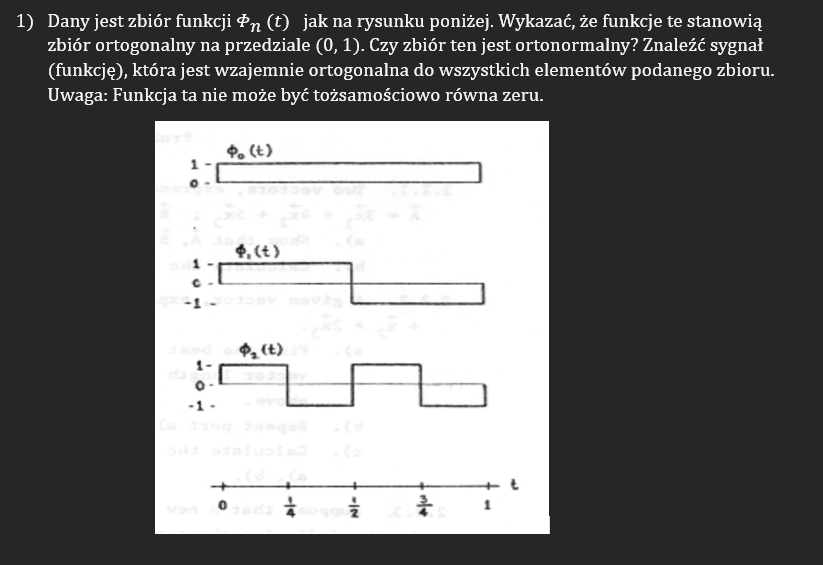

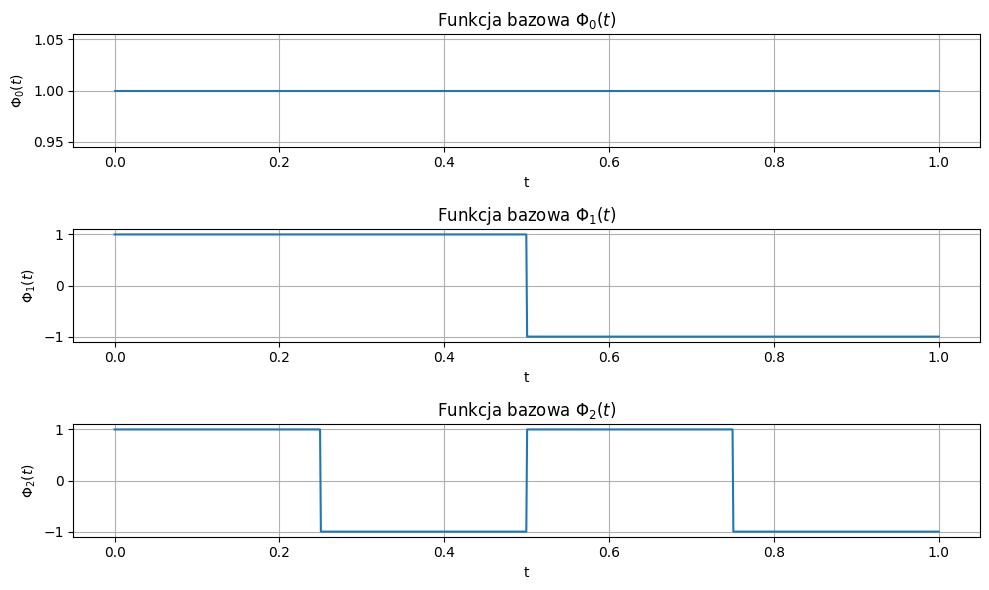

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definicja funkcji bazowych
def phi_0(t):
    return np.ones_like(t)

def phi_1(t):
    return np.where(t < 0.5, 1, -1)

def phi_2(t):
    return np.where(((t < 0.25) | ((t >= 0.5) & (t < 0.75))), 1, -1)

# Zakres czasu
t = np.linspace(0, 1, 1000)

# Wykresy dla funkcji bazowych
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(t, phi_0(t))
plt.title(r'Funkcja bazowa $\Phi_0(t)$')
plt.xlabel('t')
plt.ylabel(r'$\Phi_0(t)$')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t, phi_1(t))
plt.title(r'Funkcja bazowa $\Phi_1(t)$')
plt.xlabel('t')
plt.ylabel(r'$\Phi_1(t)$')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t, phi_2(t))
plt.title(r'Funkcja bazowa $\Phi_2(t)$')
plt.xlabel('t')
plt.ylabel(r'$\Phi_2(t)$')
plt.grid(True)

plt.tight_layout()
plt.show()


In [15]:
import numpy as np
from scipy.integrate import quad

# Definicja funkcji bazowych
def phi_0(t):
    return np.ones_like(t)

def phi_1(t):
    return np.where(t < 0.5, 1, -1)

def phi_2(t):
    return np.where(((t < 0.25) | ((t >= 0.5) & (t < 0.75))), 1, -1)

# Zakres czasu
t = np.linspace(0, 1, 1000)

# Obliczenie całek iloczynów funkcji bazowych
def calculate_integral(phi1, phi2):
    integrand = lambda t: phi1(t) * phi2(t)
    result, _ = quad(integrand, 0, 1)
    return result

# Sprawdzenie ortogonalności funkcji bazowych
integral_01 = calculate_integral(phi_0, phi_1)
integral_02 = calculate_integral(phi_0, phi_2)
integral_12 = calculate_integral(phi_1, phi_2)

print("a) Wykazanie ortogonalności funkcji bazowych:")
print("Całka z iloczynu phi_0 * phi_1:", integral_01)
print("Całka z iloczynu phi_0 * phi_2:", integral_02)
print("Całka z iloczynu phi_1 * phi_2:", integral_12)

# Sprawdzenie ortonormalności zbioru funkcji bazowych
norm_phi_0_squared = calculate_integral(phi_0, phi_0)
norm_phi_1_squared = calculate_integral(phi_1, phi_1)
norm_phi_2_squared = calculate_integral(phi_2, phi_2)

print("\nb) Sprawdzenie ortonormalności zbioru funkcji bazowych:")
print("Norma kwadratowa phi_0:", norm_phi_0_squared)
print("Norma kwadratowa phi_1:", norm_phi_1_squared)
print("Norma kwadratowa phi_2:", norm_phi_2_squared)

# Spróbuj znaleźć funkcję wzajemnie ortogonalną
def find_mutually_orthogonal_function():
    # Obliczanie całek iloczynu z każdą funkcją bazową
    integral_custom_phi_0 = calculate_integral(custom_function, phi_0)
    integral_custom_phi_1 = calculate_integral(custom_function, phi_1)
    integral_custom_phi_2 = calculate_integral(custom_function, phi_2)

    # Sprawdzenie, czy całki są bliskie zeru
    epsilon = 1e-10  # Mała wartość graniczna
    if np.abs(integral_custom_phi_0) < epsilon and np.abs(integral_custom_phi_1) < epsilon and np.abs(integral_custom_phi_2) < epsilon:
        return custom_function
    else:
        return None

# Znajdź funkcję wzajemnie ortogonalną
mutually_orthogonal_function = find_mutually_orthogonal_function()

print("\nc) Znaleziona funkcja wzajemnie ortogonalna:")
if mutually_orthogonal_function:
    print(mutually_orthogonal_function)
else:
    print("Nie udało się znaleźć funkcji wzajemnie ortogonalnej.")


a) Wykazanie ortogonalności funkcji bazowych:
Całka z iloczynu phi_0 * phi_1: 0.0
Całka z iloczynu phi_0 * phi_2: 0.0
Całka z iloczynu phi_1 * phi_2: 0.0

b) Sprawdzenie ortonormalności zbioru funkcji bazowych:
Norma kwadratowa phi_0: 1.0
Norma kwadratowa phi_1: 1.0
Norma kwadratowa phi_2: 1.0

c) Znaleziona funkcja wzajemnie ortogonalna:
Nie udało się znaleźć funkcji wzajemnie ortogonalnej.


# Zadanie 02
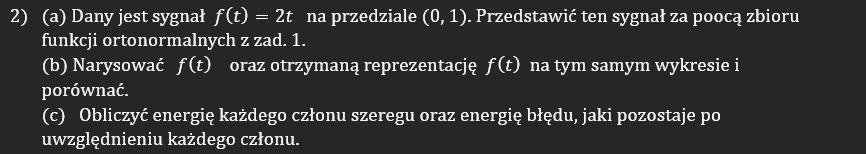

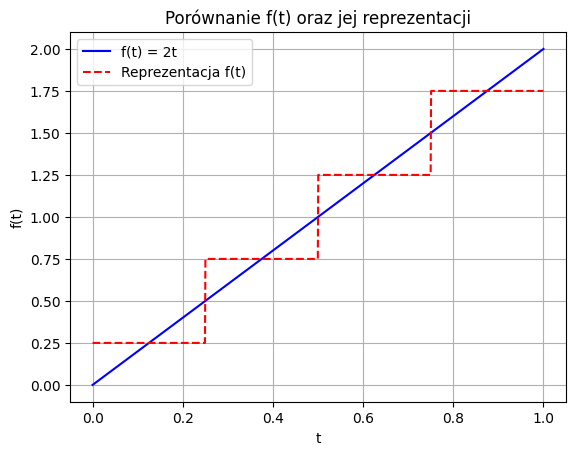

Odpowiedzi na pytania:

Energia członu 0: 1.0
Energia błędu po uwzględnieniu członu 0: 0.3125

Energia członu 1: 0.25
Energia błędu po uwzględnieniu członu 1: 1.0625

Energia członu 2: 0.0625
Energia błędu po uwzględnieniu członu 2: 1.25


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Zadanie a) Dany jest sygnał f(t) = 2t na przedziale (0, 1).
# Przedstawić ten sygnał za pomocą zbioru funkcji ortonormalnych z zad. 1.

# Definicja funkcji bazowych
def phi_0(t):
    return np.ones_like(t)

def phi_1(t):
    return np.where(t < 0.5, 1, -1)

def phi_2(t):
    return np.where(((t < 0.25) | ((t >= 0.5) & (t < 0.75))), 1, -1)

# Definicja funkcji f(t)
def f(t):
    return 2 * t

# Zakres czasu
t = np.linspace(0, 1, 1000)

# Obliczenie współczynników fn
def calculate_fn(phi, f):
    numerator, _ = quad(lambda t: f(t) * np.conj(phi(t)), 0, 1)
    denominator, _ = quad(lambda t: np.abs(phi(t))**2, 0, 1)
    return numerator / denominator

# Obliczenie reprezentacji f(t) za pomocą zbioru funkcji bazowych
def representation(t, phis, fns):
    result = np.zeros_like(t)
    for phi, fn in zip(phis, fns):
        result += fn * phi(t)
    return result

# Obliczenie energii każdego członu szeregu
def calculate_energy(phi, fn):
    squared_phi, _ = quad(lambda t: np.abs(phi(t))**2, 0, 1)
    energy = np.abs(fn)**2 * squared_phi
    return energy

# Obliczenie całkowitej energii funkcji f(t)
def calculate_total_energy(phis, fns):
    total_energy = 0
    for phi, fn in zip(phis, fns):
        total_energy += calculate_energy(phi, fn)
    return total_energy

# Obliczenie energii błędu dla każdego członu szeregu
def calculate_error_energy(phi, fn, total_energy_f):
    squared_phi, _ = quad(lambda t: np.abs(phi(t))**2, 0, 1)
    error_energy = total_energy_f - np.abs(fn)**2 * squared_phi
    return error_energy

# Obliczenie współczynników fn
f0 = calculate_fn(phi_0, f)
f1 = calculate_fn(phi_1, f)
f2 = calculate_fn(phi_2, f)

# Utworzenie zbioru funkcji ortonormalnych
phis = [phi_0, phi_1, phi_2]
fns = [f0, f1, f2]

# Obliczenie reprezentacji f(t)
f_representation = representation(t, phis, fns)

# Obliczenie całkowitej energii funkcji f(t)
total_energy_f = calculate_total_energy(phis, fns)

# Narysowanie f(t) oraz jej reprezentacji na jednym wykresie
plt.plot(t, f(t), label='f(t) = 2t', color='blue')
plt.plot(t, f_representation, label='Reprezentacja f(t)', linestyle='--', color='red')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Porównanie f(t) oraz jej reprezentacji')
plt.legend()
plt.grid(True)
plt.show()

# Wyświetlenie wyników
print("Odpowiedzi na pytania:")
for i, (phi, fn) in enumerate(zip(phis, fns)):
    energy_term = calculate_energy(phi, fn)
    error_energy = calculate_error_energy(phi, fn, total_energy_f)
    print(f"\nEnergia członu {i}: {energy_term}")
    print(f"Energia błędu po uwzględnieniu członu {i}: {error_energy}")
